In [1]:
# first shot of introducing external trigger to the ASIC

In [2]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/DuSci/Figures/'
%config InlineBackend.figure_format = 'retina'

In [78]:
NoExtTrig = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/external_trigger/rate_1Hz/no_source_no_trigger_10sec_singles.txt',delimiter='\t',names=['time','charge','channel'])
WithExtTrig = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/external_trigger/rate_1Hz/no_source_with_trigger_10sec_singles.txt',delimiter='\t',names=['time','charge','channel'])

In [83]:
data_channels = np.unique(NoExtTrig.channel)
WithExtTrig['trigger'] = 0
WithExtTrig[(WithExtTrig.channel==896)]['trigger'] = 1
WithExtTrig

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,charge,channel,trigger
0,623815956420,7.228691,546,0
1,628769102729,6.816978,917,0
2,681575692114,18.680553,917,0
3,690292416916,15.380920,546,0
4,748639640058,21.437614,546,0
5,825862024922,18.896507,917,0
6,829781283255,19.869965,917,0
7,873217565329,5.327007,917,0
8,906862332823,12.106094,917,0
9,907432432359,17.606400,917,0


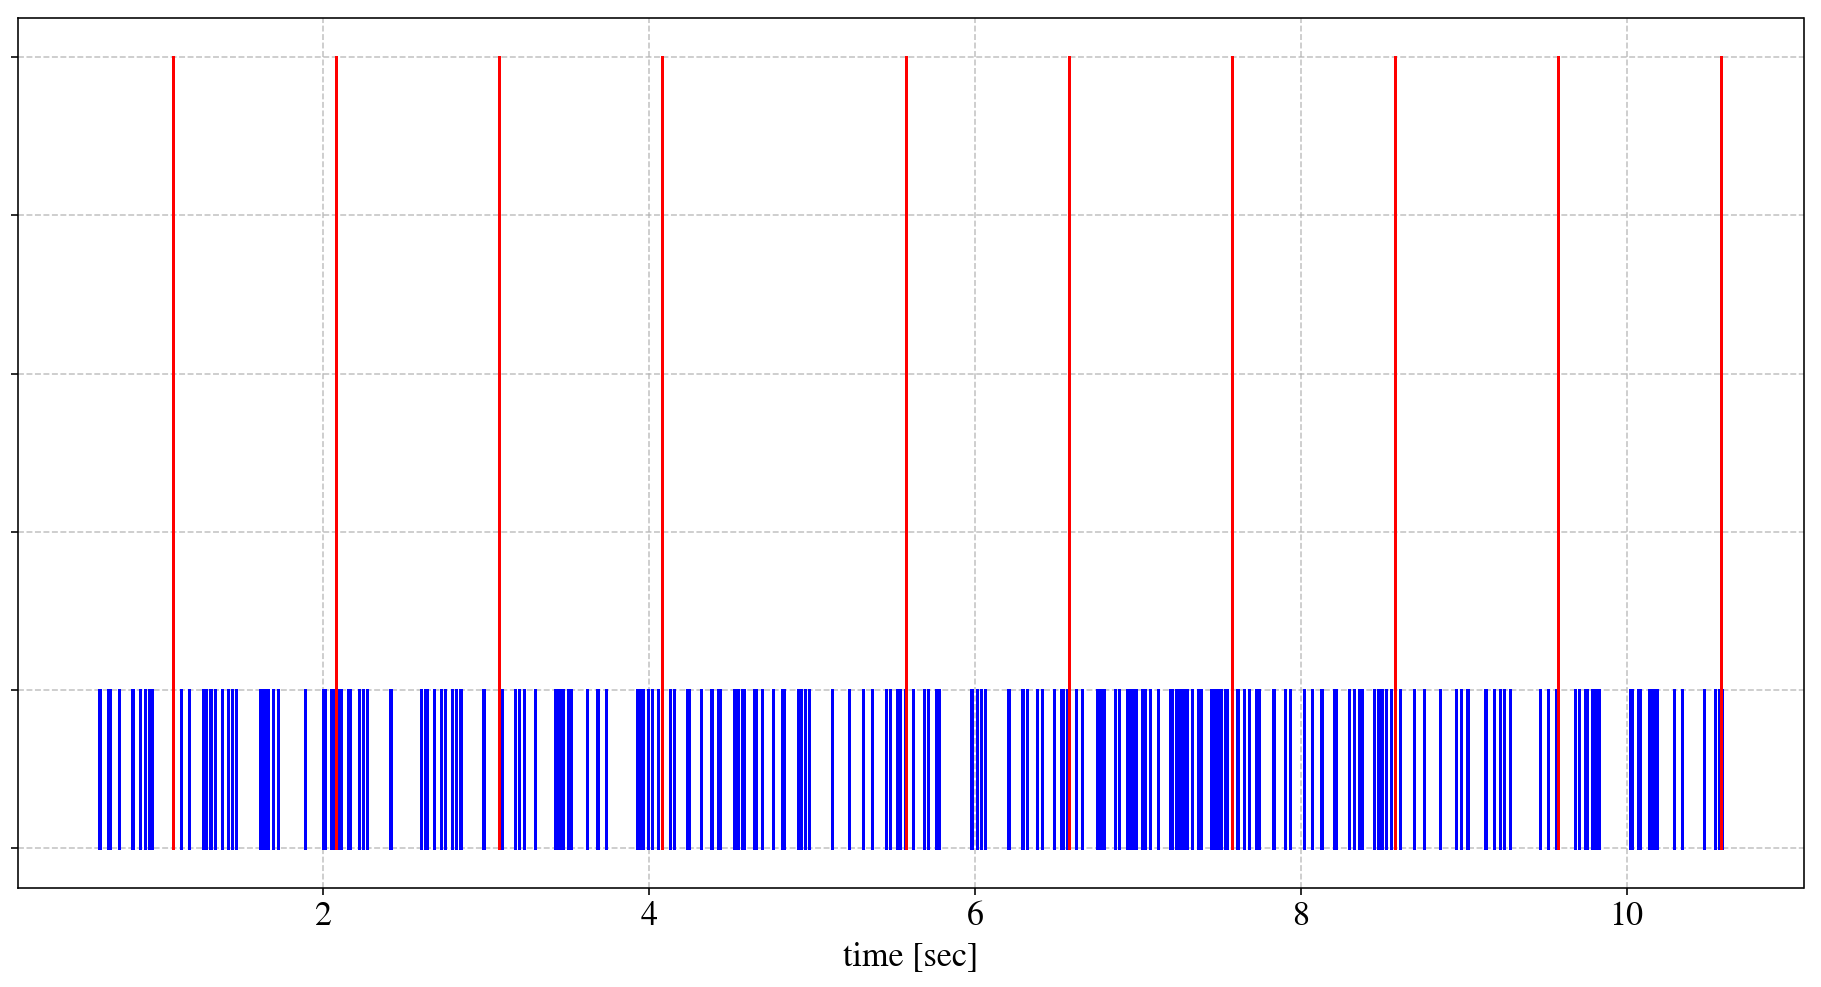

In [120]:
sec = 1.e12
fig,ax=plt.subplots(figsize=(16,8)); 
data = WithExtTrig[WithExtTrig.channel!=896];
for t in [data.time]:
    plt.plot( [t/sec,t/sec] , [0,0.2] , 'b')

trigger = WithExtTrig[WithExtTrig.channel==896];
for t in [trigger.time]:
    plt.plot( [t/sec,t/sec] , [0,1] , 'r')

set_axes(ax=ax,x_label='time [sec]',y_label='',remove_ticks_y=True, fontsize=17,do_add_grid=True);